# Evaluating Answers
                

In [2]:
from commonfunctions import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

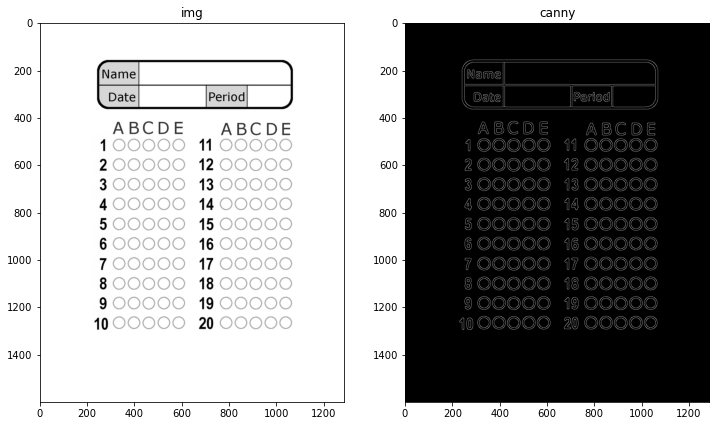

x centers [ 784  333  333  973  784  973  784  333  973  973  522  333  333 1036
  458  458 1036  522  522  333  522  973  585  784 1036  396  784  333
  909  973  333 1036  584  522  847  909  847  909 1036  973  585  784
  847  585  458  522  847  973  584  847  522  847  847  847  784  522
  909  396  458  396  396  522  396  973  333  522  458  909  333  458
  396  396  847  784  847  973  396  847  522  784  396  909  584  909
  396 1036  910  847  396  522  458  458  396  396 1036  784  396  396
  847  458]
y centers [1015 1015  597 1182  680 1265  597  763  848  763  763  680 1099  680
  681 1016 1099 1099 1182  514  930  514  763  763 1015 1015 1099 1182
  681 1099  930  763  680  514  680 1016  763  598  597  930 1015  514
  514  597  598 1015 1015 1015 1099 1099 1265  597 1182  930  930  680
  515 1099  515  763  597  597  680  680 1265  848  931 1100  848 1100
  514  930 1265 1182  848  597 1099  597  597  848 1182  931  514  764
  514  514 1183  514  597 1015 1182  764  680

<ipython-input-11-b5540363fd29>:14: FutureWarning: Pass-through of possibly RGB images in gray2rgb is deprecated. In version 0.19, input arrays will always be considered grayscale, even if the last dimension has length 3 or 4. To prevent this warning and ensure compatibility with future versions, detect RGB images outside of this function.
  image = gray2rgb(image)


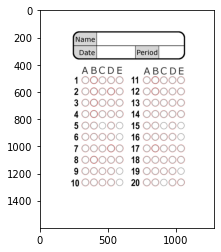

In [11]:
image=io.imread("bubbles_empty.JPEG")
img_canny=canny(rgb2gray(image),3)
show_images([image,img_canny],["img","canny"])

hough_radii = np.arange(25, 30, 1)
hough_res = hough_circle(img_canny, hough_radii)
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii,total_num_peaks=100)

print("x centers",cx)
print("y centers",cy)
print("radii",radii)

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 4))
image = gray2rgb(image)
for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = circle_perimeter(center_y, center_x, radius,
                                    shape=image.shape)
    image[circy, circx] = (220, 20, 20)

ax.imshow(image, cmap=plt.cm.gray)
plt.show()

#(houghSpace,angles, distances) = hough_line_peaks(hspace=houghSpace1,angles = angles1, dists= distances1,threshold=int(0.5*np.max(houghSpace1)))

In [12]:
def loadImage(path):
    image = io.imread(path)
    if len(image.shape) > 2:
        image = (rgb2gray(image)*255).astype('uint8')
    else:
        image = (image).astype('uint8')
    return image

In [27]:
#image = loadImage('circles.jpg')
image = loadImage('ref.jpeg')
# edge detection
img = canny(image)
(M,N) = img.shape
R_max = 30 #np.max((M,N))
R_min = 20
threshold = 10
region = 10
R = R_max - R_min
#Initializing accumulator array.
#Accumulator array is a 3 dimensional array with the dimensions representing
#the radius, X coordinate and Y coordinate resectively.
#Also appending a padding of 2 times R_max to overcome the problems of overflow
A = np.zeros((R_max,M+2*R_max,N+2*R_max))
B = np.zeros((R_max,M+2*R_max,N+2*R_max))
#Precomputing all angles to increase the speed of the algorithm
theta = np.arange(0,360)*np.pi/180
edges = np.argwhere(img[:,:]) #Extracting all edge coordinates
for val in range(R):
    r = R_min+val
    #Creating a Circle Blueprint
    bprint = np.zeros((2*(r+1) - 1,2*(r+1) - 1))
    (m,n) = (r,r) #Finding out the center of the blueprint
    for angle in theta:
        x = int(np.round(r*np.cos(angle)))
        y = int(np.round(r*np.sin(angle)))
        bprint[m+x,n+y] = 1
    constant = np.argwhere(bprint).shape[0]
    for x,y in edges: #For each edge coordinates
        #Centering the blueprint circle over the edges
        #and updating the accumulator array
        X = [x-m-1+R_max,x+m+R_max] #Computing the extreme X values
        Y = [y-n-1+R_max,y+n+R_max] #Computing the extreme Y values
        A[r,X[0]:X[1],Y[0]:Y[1]] += bprint
    A[r][A[r]<threshold*constant/r] = 0
for r,x,y in np.argwhere(A):
    temp = A[r-region:r+region,x-region:x+region,y-region:y+region]
    try:
        p,a,b = np.unravel_index(np.argmax(temp),temp.shape)
    except:
        continue
    B[r+(p-region),x+(a-region),y+(b-region)] = 1
circles = B[:,R_max:-R_max,R_max:-R_max] #removing padding
#fig = plt.figure()
#fig, ax = plt.subplots()
#plt.imshow(image)
circleCoordinates = np.argwhere(circles) #Extracting the circle information
print('Done!')

Done!


22
22
22
22
22
22
22
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27


<Figure size 432x288 with 0 Axes>

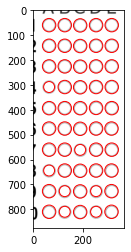

50


In [28]:
fig = plt.figure()
fig, ax = plt.subplots()
plt.imshow(image)
circleCoordinates = np.argwhere(circles) #Extracting the circle information
circle = []
for r,x,y in circleCoordinates:
    print(r )
    circle.append(plt.Circle((y,x),r,color=(1,0,0),fill=False,linewidth=1))
    ax.add_patch(circle[-1])
plt.show()
print(len(circle))

In [1]:
answers= loadImage('Answered.jpeg')
ref= loadImage('ref.jpeg')
diff = ref - answers
thresh = threshold_otsu(diff)
diff=diff > thresh
answers_closing = closing(diff,np.ones((3,3),dtype=int))

show_images([diff],["diff"])

NameError: name 'loadImage' is not defined

In [64]:

def count_white(r,x,y):
    top_l = (x-r//2,y-r//2)
    bottom_r = (x+r//2,y+r//2)
    count_white=0
    for ix in range(top_l[0],bottom_r[0]):
        for jy in range(top_l[1],bottom_r[1]):
            if diff[ix,jy]==1:
                count_white+=1
    return count_white

    
radii= circleCoordinates[:,0]
radius=np.average(radii)
print(radius)

for r,x,y in circleCoordinates:
    #TODO: sort x and y  
    if x > 800:
        perim_circ= np.pi * radius * 2
        white = count_white(r,x,y)
        print(white,x,y)
        if white > perim_circ:
            print("answer --> " , (x,y))
    

26.3
3 810 126
1 810 252
7 810 63
10 810 314
641 811 188
answer -->  (811, 188)


In [ ]:
cross = loadImage("bubble_w_cross.png")
